In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FloatImage
from folium import GeoJsonTooltip
import matplotlib.pyplot as plt
from geopy.geocoders import GoogleV3
import numpy as np
import geocoder
import json
from geojson import Feature, FeatureCollection, Point

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [3]:
gzones = gpd.read_file('GowanusRezone.kml', driver = 'KML')

C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


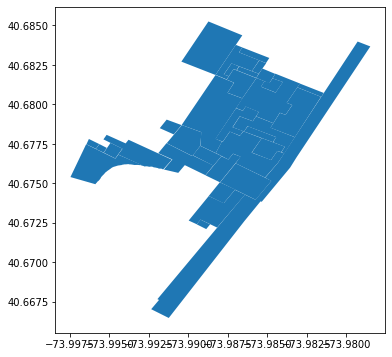

In [4]:
gzones.plot(figsize=(6, 6))
plt.show()

In [5]:
df = pd.read_csv('gcords.csv')

In [6]:
df['Zip']

0     10018
1     10271
2     10001
3     11201
4     10013
5     10013
6     10018
7     10018
8     10011
9     10013
10    11231
11    11217
12    11231
13    11217
14    11217
15    33196
Name: Zip, dtype: int64

In [7]:
# gcords.at[2,'lat']=(40.67576082609622)
# gcords.at[2,'lon']=(-73.98471114856997)

In [8]:
df.columns

Index(['Unnamed: 0', 'Total Construction Floor Area', 'Owner/Developer', 'Zip',
       'State', 'Borough', 'Street Name', 'House No',
       'Proposed Dwelling Units', 'lat', 'lon', 'display_address'],
      dtype='object')

In [9]:
%store -r google_maps_API_Key
geolocator = GoogleV3(api_key=google_maps_API_Key)

In [10]:
df['Zip'] = df['Zip'].astype(str)

In [11]:
df.at[2,'Zip']=('11215')

In [12]:
df['Address'] = df['House No'] + ' ' + df['Street Name'] + ' ' + df['Borough'] + ' ' + df['State'] + ' ' + df['Zip']
df['Address']

0                374 Fourth Avenue Brooklyn, N.Y. 10018
1                540 Degraw Street Brooklyn, N.Y. 10271
2                     288 4 Avenue Brooklyn, N.Y. 11215
3               404 Carroll Street Brooklyn, N.Y. 11201
4                 577 Union Street Brooklyn, N.Y. 10013
5              251 Douglass Street Brooklyn, N.Y. 10013
6               498 Sackett Street Brooklyn, N.Y. 10018
7                  267 Bond Street Brooklyn, N.Y. 10018
8                     129 3 Street Brooklyn, N.Y. 10011
9                 477 Smith Street Brooklyn, N.Y. 10013
10                498 Union Street Brooklyn, N.Y. 11231
11               164 Fourth Avenue Brooklyn, N.Y. 11217
12                                                  NaN
13    117 & 211 Hoyt Street (Gowanus Houses) Brookly...
14    272 Wyckoff Street (Wyckoff Gardens) Brooklyn,...
15             192 Douglass Street Brooklyn, N.Y. 33196
Name: Address, dtype: object

In [13]:
df.at[12,'Address']=('4th Pl & Smith St Brooklyn, NY 11231')

In [14]:
df.at[2,'Zip']=('11215')

In [15]:
df['loc'] = df['Address'].apply(geolocator.geocode, timeout=10)

In [16]:
df['loc']

0     (374 4th Ave, Brooklyn, NY 11215, USA, (40.672...
1     (540 Degraw St, Brooklyn, NY 11217, USA, (40.6...
2     (288 4th Ave, Brooklyn, NY 11215, USA, (40.675...
3     (404 Carroll St, Brooklyn, NY 11231, USA, (40....
4     (577 Union St, Brooklyn, NY 11215, USA, (40.67...
5     (251 Douglass St, Brooklyn, NY 11217, USA, (40...
6     (498 Sackett St, Brooklyn, NY 11231, USA, (40....
7     (267 Bond St, Brooklyn, NY 11217, USA, (40.680...
8     (129 3rd St, Brooklyn, NY 11231, USA, (40.6769...
9     (477 Smith St, Brooklyn, NY 11231, USA, (40.67...
10    (498 Union St, Brooklyn, NY 11231, USA, (40.67...
11    (164 4th Ave, Brooklyn, NY 11217, USA, (40.679...
12    (4th Pl & Smith St, Brooklyn, NY 11231, USA, (...
13    (211 Hoyt St, Brooklyn, NY 11217, USA, (40.683...
14    (272 Wyckoff St, Brooklyn, NY 11217, USA, (40....
15    (192 Douglass St, Brooklyn, NY 11217, USA, (40...
Name: loc, dtype: object

In [17]:
df['point'] = df['loc'].apply(lambda loc: tuple(loc.point) if loc else None)

### How to count Nan values in a DF:
### https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
### df['point'].isna().sum()

In [18]:
### This code is only to be used if the geocoder can't locate an address for whatever reason.
### Reference: https://www.askpython.com/python-modules/pandas/update-the-value-of-a-row-dataframe

### The workaround is to go to Google maps and get the coordinates manually.
### Pseudocode: dataframe.at[index,'column_name']=Stuff you want inserted. Existing stuff gets deleted.

#df.at[3,'point']=(26.24577006608599, -80.1567458383094,0.0)
#df.at[1,'point']=(26.260767653231248, -80.09894427774218,0.0)

df['Address'] = df['Address'].str.title()
df['Address']

0                374 Fourth Avenue Brooklyn, N.Y. 10018
1                540 Degraw Street Brooklyn, N.Y. 10271
2                     288 4 Avenue Brooklyn, N.Y. 11215
3               404 Carroll Street Brooklyn, N.Y. 11201
4                 577 Union Street Brooklyn, N.Y. 10013
5              251 Douglass Street Brooklyn, N.Y. 10013
6               498 Sackett Street Brooklyn, N.Y. 10018
7                  267 Bond Street Brooklyn, N.Y. 10018
8                     129 3 Street Brooklyn, N.Y. 10011
9                 477 Smith Street Brooklyn, N.Y. 10013
10                498 Union Street Brooklyn, N.Y. 11231
11               164 Fourth Avenue Brooklyn, N.Y. 11217
12                 4Th Pl & Smith St Brooklyn, Ny 11231
13    117 & 211 Hoyt Street (Gowanus Houses) Brookly...
14    272 Wyckoff Street (Wyckoff Gardens) Brooklyn,...
15             192 Douglass Street Brooklyn, N.Y. 33196
Name: Address, dtype: object

Columns must be same length as key explained
- https://cumsum.wordpress.com/2021/06/01/pandas-valueerror-columns-must-be-same-length-as-key/

Creating `df2` based on `df` row indicies.

https://datascience.stackexchange.com/questions/77033/creating-a-new-dataframe-with-specific-row-numbers-from-another

What's tripping this error is when the lat/lon/alititude generator is fed a Nan value to parse - it's effectively trying to split a `null` value into three separate parts - which is impossible.

The code below effectively caputres the anatomy of this error. It creates a new `df` based on a list of indicies from an existing one. Row `56` has no `point` since the `geocoder` couldn't find coordinates for it. The other three do. Splitting the `point` column fails only when row `56` - with `null` values - is attempted.
```
df2 = df.iloc[[56,57,58,59],:]
df2[['lat','lon','altitude']] = pd.DataFrame(df2['point'].to_list(),index=df2.index)
```

In [19]:
df[['lat','lon','altitude']] = pd.DataFrame(df['point'].to_list(),index=df.index)

df

,Unnamed: 0,Total Construction Floor Area,Owner/Developer,Zip,State,Borough,Street Name,House No,Proposed Dwelling Units,lat,lon,display_address,Address,loc,point,altitude
0,0,"210,936",Quinlan Development Group,10018,N.Y.,"Brooklyn,",Fourth Avenue,374,197,40.672848,-73.987181,"374 Fourth Avenue Brooklyn, N.Y. 10018","374 Fourth Avenue Brooklyn, N.Y. 10018","(374 4th Ave, Brooklyn, NY 11215, USA, (40.672...","(40.6728484, -73.98718099999999, 0.0)",0.0
1,1,"312,858","Vorea Group, Domain Companies",10271,N.Y.,"Brooklyn,",Degraw Street,540,268,40.680226,-73.986367,"540 Degraw Street Brooklyn, N.Y. 10271","540 Degraw Street Brooklyn, N.Y. 10271","(540 Degraw St, Brooklyn, NY 11217, USA, (40.6...","(40.6802258, -73.9863666, 0.0)",0.0
2,2,"59,683",Crown Acquisitions,11215,N.Y.,"Brooklyn,",4 Avenue,288,66,40.675685,-73.984709,"288 4 Avenue Brooklyn, N.Y. 10001","288 4 Avenue Brooklyn, N.Y. 11215","(288 4th Ave, Brooklyn, NY 11215, USA, (40.675...","(40.6756847, -73.98470859999999, 0.0)",0.0
3,3,"385,231","Vorea Group, Domain Companies",11201,N.Y.,"Brooklyn,",Carroll Street,404,360,40.678143,-73.989366,"404 Carroll Street Brooklyn, N.Y. 11201","404 Carroll Street Brooklyn, N.Y. 11201","(404 Carroll St, Brooklyn, NY 11231, USA, (40....","(40.6781431, -73.98936619999999, 0.0)",0.0
4,4,"201,853",Tavros Capital Partners,10013,N.Y.,"Brooklyn,",Union Street,577,214,40.678853,-73.986056,"577 Union Street Brooklyn, N.Y. 10013","577 Union Street Brooklyn, N.Y. 10013","(577 Union St, Brooklyn, NY 11215, USA, (40.67...","(40.6788529, -73.9860561, 0.0)",0.0
5,5,"223,886",Tavros Capital Partners,10013,N.Y.,"Brooklyn,",Douglass Street,251,261,40.680943,-73.985195,"251 Douglass Street Brooklyn, N.Y. 10013","251 Douglass Street Brooklyn, N.Y. 10013","(251 Douglass St, Brooklyn, NY 11217, USA, (40...","(40.6809431, -73.9851953, 0.0)",0.0
6,6,"229,929",Property Markets Group,10018,N.Y.,"Brooklyn,",Sackett Street,498,173,40.680258,-73.988742,"498 Sackett Street Brooklyn, N.Y. 10018","498 Sackett Street Brooklyn, N.Y. 10018","(498 Sackett St, Brooklyn, NY 11231, USA, (40....","(40.68025799999999, -73.988742, 0.0)",0.0
7,7,"364,003",Property Markets Group,10018,N.Y.,"Brooklyn,",Bond Street,267,344,40.680877,-73.988746,"267 Bond Street Brooklyn, N.Y. 10018","267 Bond Street Brooklyn, N.Y. 10018","(267 Bond St, Brooklyn, NY 11217, USA, (40.680...","(40.6808769, -73.98874599999999, 0.0)",0.0
8,8,"89,203",Property Markets Group/Orange Management,10011,N.Y.,"Brooklyn,",3 Street,129,84,40.676939,-73.991456,"129 3 Street Brooklyn, N.Y. 10011","129 3 Street Brooklyn, N.Y. 10011","(129 3rd St, Brooklyn, NY 11231, USA, (40.6769...","(40.6769389, -73.9914555, 0.0)",0.0
9,9,"421,918",Yoel Schwimmer,10013,N.Y.,"Brooklyn,",Smith Street,477,496,40.672258,-73.999314,"477 Smith Street Brooklyn, N.Y. 10013","477 Smith Street Brooklyn, N.Y. 10013","(477 Smith St, Brooklyn, NY 11231, USA, (40.67...","(40.6722579, -73.9993136, 0.0)",0.0


In [20]:
df.head(3)

,Unnamed: 0,Total Construction Floor Area,Owner/Developer,Zip,State,Borough,Street Name,House No,Proposed Dwelling Units,lat,lon,display_address,Address,loc,point,altitude
0,0,"210,936",Quinlan Development Group,10018,N.Y.,"Brooklyn,",Fourth Avenue,374,197,40.672848,-73.987181,"374 Fourth Avenue Brooklyn, N.Y. 10018","374 Fourth Avenue Brooklyn, N.Y. 10018","(374 4th Ave, Brooklyn, NY 11215, USA, (40.672...","(40.6728484, -73.98718099999999, 0.0)",0.0
1,1,"312,858","Vorea Group, Domain Companies",10271,N.Y.,"Brooklyn,",Degraw Street,540,268,40.680226,-73.986367,"540 Degraw Street Brooklyn, N.Y. 10271","540 Degraw Street Brooklyn, N.Y. 10271","(540 Degraw St, Brooklyn, NY 11217, USA, (40.6...","(40.6802258, -73.9863666, 0.0)",0.0
2,2,"59,683",Crown Acquisitions,11215,N.Y.,"Brooklyn,",4 Avenue,288,66,40.675685,-73.984709,"288 4 Avenue Brooklyn, N.Y. 10001","288 4 Avenue Brooklyn, N.Y. 11215","(288 4th Ave, Brooklyn, NY 11215, USA, (40.675...","(40.6756847, -73.98470859999999, 0.0)",0.0


In [21]:
df.at[2,'display_address']=('284 4 Avenue Brooklyn, N.Y. 11215')

In [22]:
m = folium.Map(location=[40.6725, -73.985], zoom_start=14.45, tiles='CartoDB positron')
title_html = '''
              <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Gaga for Gowanus: New residential projects with > 50 units')

caption_html = '''
             <p align="center" style="vertical-align: bottom; font-size:13px"><i>{}</i></p>
             '''.format('Blue areas represent districts where lawmakers voted to allow mixed-use buildings in an area largely restricted to manufacturing use.')

marker_cluster = MarkerCluster().add_to(m)

for i, r in gzones.iterrows():
    try:
      sim_geo = gpd.GeoSeries(r['geometry'])
      geo_j = sim_geo.to_json()
      geo_j = folium.GeoJson(data=geo_j)
      folium.Tooltip(r['Name']).add_to(geo_j)
      geo_j.add_to(m)
    except Exception as e:
      print(e)
      pass

marker_cluster = MarkerCluster().add_to(m)

for i,r in df.iterrows():
    location = (r["lat"], r["lon"])
    info = (r["Owner/Developer"], r["Total Construction Floor Area"], r['Proposed Dwelling Units'], r['display_address'])
    info = list(info)
    new_line = '<br>'
    bold_start = '<strong>'
    bold_end = '</strong>'
    text = f'Owner/Developer: {bold_start}{info[0]}{bold_end}{new_line}Total Construction Floor Area: {bold_start}{info[1]} sq ft{bold_end}{new_line}Proposed Dwelling Units: {bold_start}{info[2]}{bold_end}{new_line}Address: {bold_start}{info[3]}{bold_end}'
    folium.Marker(location=location,
                      tooltip=text)\
    .add_to(marker_cluster)

m.get_root().html.add_child(folium.Element(title_html))
m.get_root().html.add_child(folium.Element(caption_html))
m

In [23]:
m.save('index.html')